In [2]:
import pandas as pd
import numpy as np

In [3]:
user_data = {
    "MarksA": np.random.randint(1,100,5),
    "MarksB": np.random.randint(50,100,5),
    "MarksC": np.random.randint(1,100,5)
}

In [4]:
df = pd.DataFrame(user_data)
print(df)

   MarksA  MarksB  MarksC
0      23      97      93
1       7      70      34
2      55      85      30
3      61      87      71
4      48      50      13


In [5]:
df.head()

,MarksA,MarksB,MarksC
0,23,97,93
1,7,70,34
2,55,85,30
3,61,87,71
4,48,50,13


In [6]:
df.to_csv('marks.csv')

In [8]:
my_data = pd.read_csv('marks.csv')
my_data = my_data.drop(columns=['Unnamed: 0'])
my_data

,MarksA,MarksB,MarksC
0,23,97,93
1,7,70,34
2,55,85,30
3,61,87,71
4,48,50,13


In [9]:
my_data.describe()

,MarksA,MarksB,MarksC
count,5.000000,5.000000,5.000000
mean,38.800000,77.800000,48.200000
std,22.917242,18.294808,32.782617
min,7.000000,50.000000,13.000000
25%,23.000000,70.000000,30.000000
50%,48.000000,85.000000,34.000000
75%,55.000000,87.000000,71.000000
max,61.000000,97.000000,93.000000


In [10]:
 df.iloc[3]

MarksA    61
MarksB    87
MarksC    71
Name: 3, dtype: int32

In [11]:
df.iloc[3,1]

87

In [17]:
idx = [df.columns.get_loc('MarksA'),df.columns.get_loc('MarksC')]
print(idx)
df.iloc[3,idx]

[0, 2]


MarksA    61
MarksC    71
Name: 3, dtype: int32

In [18]:
df.iloc[:3,idx]

,MarksA,MarksC
0,23,93
1,7,34
2,55,30


In [21]:
my_data.sort_values(by=['MarksC','MarksA'],ascending=False)

,MarksA,MarksB,MarksC
0,23,97,93
3,61,87,71
1,7,70,34
2,55,85,30
4,48,50,13


In [22]:
data_array = my_data.values

In [23]:
print(data_array)

[[23 97 93]
 [ 7 70 34]
 [55 85 30]
 [61 87 71]
 [48 50 13]]


In [24]:
print(type(data_array))

<class 'numpy.ndarray'>


In [26]:
data_array.shape

(5, 3)

In [27]:
data_array[2][2]

30

In [29]:
new_df = pd.DataFrame(data_array,columns=['Physics','Chemistry','Math'])
new_df

,Physics,Chemistry,Math
0,23,97,93
1,7,70,34
2,55,85,30
3,61,87,71
4,48,50,13


In [31]:
new_df.to_csv('pcm.csv')

# Loading and Visualizing the MNIST Dataset

In [61]:
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('mnist_train.csv')

In [63]:
df.shape

(42000, 785)

In [64]:
df.head(n=3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
image1 = np.array(df.iloc[0,1:],dtype='uint32').reshape(28,28)
print(image1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

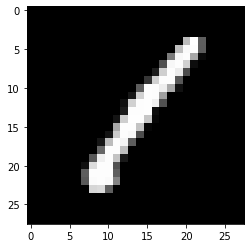

In [52]:
plt.imshow(image1,cmap='gray')
plt.show()

In [68]:
data = df.values
np.random.shuffle(data)
X = data[:,1:]
Y = data[:,0]

In [69]:
split = int(0.8*X.shape[0])
print(split)

33600


In [70]:
X_train,Y_train = X[ : split, : ],Y[ : split]
X_test,Y_test = X[split : , : ],Y[split : ]

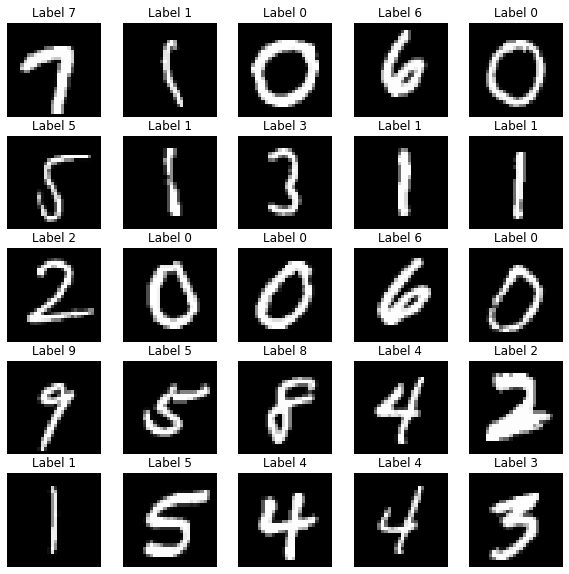

In [77]:
#Try to plot the visualization(Grid of first five images 5x5)
plt.figure(figsize =(10,10) )
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.title("Label "+str(Y_train[i]))
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Let's Work on a Movie Dataset
Task : Make a scatter plot between Length of Movie Title (X-axis) and Frequency of the occurence of that length(along Y-axis) 

In [83]:
movie_df = pd.read_csv('movie-dataset.csv')

In [89]:
X = movie_df['movie_title']

In [104]:
freq_title = {}
for t in X:
    length = len(t)
    try:
        freq_title[length] += 1
    except:
        freq_title[length] = 1

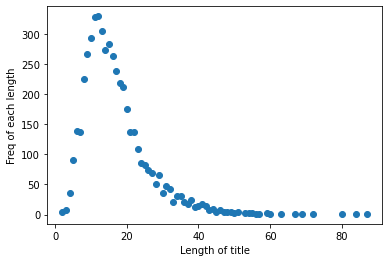

In [106]:
plt.scatter(freq_title.keys(),freq_title.values())
plt.ylabel("Freq of each length")
plt.xlabel("Length of title")
plt.show()